<a href="https://colab.research.google.com/github/nocturnal-deviant/nocturnal-deviant/blob/main/Speech_emotion_recognition(SER)_NLP(train).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import nltk
import re
from nltk.stem import WordNetLemmatizer

In [150]:
df=pd.read_csv('/content/train.csv',header=None,sep=';',encoding='ISO-8859-1')
df.columns=['Comment','Result']
df.head()

,Comment,Result
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [114]:
df.shape

(16000, 2)

In [115]:
print(df.isna().sum())

Comment    0
Result     0
dtype: int64


<Axes: xlabel='Result', ylabel='count'>

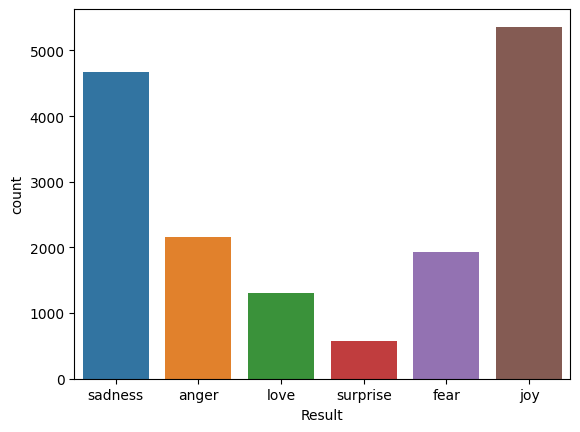

In [116]:
sns.countplot(x='Result',data=df)

In [117]:
df.value_counts(['Result'])

Result  
joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
dtype: int64

In [118]:
df

,Comment,Result
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
15995,i just had a very brief time in the beanbag an...,sadness
15996,i am now turning and i feel pathetic that i am...,sadness
15997,i feel strong and good overall,joy
15998,i feel like this was such a rude comment and i...,anger


In [119]:
df['Result']=df['Result'].map({'joy':1,'sadness':'0','anger':-1,'fear':-2,'love':2,'surprise':3})
df

,Comment,Result
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,-1
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,-1
...,...,...
15995,i just had a very brief time in the beanbag an...,0
15996,i am now turning and i feel pathetic that i am...,0
15997,i feel strong and good overall,1
15998,i feel like this was such a rude comment and i...,-1


In [120]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [121]:
sen=df.Comment
sen

0                                  i didnt feel humiliated
1        i can go from feeling so hopeless to so damned...
2         im grabbing a minute to post i feel greedy wrong
3        i am ever feeling nostalgic about the fireplac...
4                                     i am feeling grouchy
                               ...                        
15995    i just had a very brief time in the beanbag an...
15996    i am now turning and i feel pathetic that i am...
15997                       i feel strong and good overall
15998    i feel like this was such a rude comment and i...
15999    i know a lot but i feel so stupid because i ca...
Name: Comment, Length: 16000, dtype: object

In [122]:
#Tokenizing the input Value
from nltk import TweetTokenizer
tk=TweetTokenizer()
sen=sen.apply(lambda x:tk.tokenize(x)).apply(lambda x:" ".join(x))
sen

0                                  i didnt feel humiliated
1        i can go from feeling so hopeless to so damned...
2         im grabbing a minute to post i feel greedy wrong
3        i am ever feeling nostalgic about the fireplac...
4                                     i am feeling grouchy
                               ...                        
15995    i just had a very brief time in the beanbag an...
15996    i am now turning and i feel pathetic that i am...
15997                       i feel strong and good overall
15998    i feel like this was such a rude comment and i...
15999    i know a lot but i feel so stupid because i ca...
Name: Comment, Length: 16000, dtype: object

In [123]:
#removing all the unwanted values
sen=sen.str.replace('[^a-zA-Z0-9]+'," ")
sen

<ipython-input-123-dd3c0323f6ed>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  sen=sen.str.replace('[^a-zA-Z0-9]+'," ")


0                                  i didnt feel humiliated
1        i can go from feeling so hopeless to so damned...
2         im grabbing a minute to post i feel greedy wrong
3        i am ever feeling nostalgic about the fireplac...
4                                     i am feeling grouchy
                               ...                        
15995    i just had a very brief time in the beanbag an...
15996    i am now turning and i feel pathetic that i am...
15997                       i feel strong and good overall
15998    i feel like this was such a rude comment and i...
15999    i know a lot but i feel so stupid because i ca...
Name: Comment, Length: 16000, dtype: object

In [124]:
#tokenizing the input data and removing all the words which have letters less than or equal to 3
from nltk.tokenize import word_tokenize
sen=sen.apply(lambda x:' '.join([w for w in word_tokenize(x) if len(w)>=3]))
sen

0                                    didnt feel humiliated
1        can from feeling hopeless damned hopeful just ...
2                   grabbing minute post feel greedy wrong
3        ever feeling nostalgic about the fireplace wil...
4                                          feeling grouchy
                               ...                        
15995    just had very brief time the beanbag and said ...
15996    now turning and feel pathetic that still waiti...
15997                         feel strong and good overall
15998    feel like this was such rude comment and glad ...
15999     know lot but feel stupid because can not portray
Name: Comment, Length: 16000, dtype: object

In [125]:
#stemming the input data
from IPython.lib.display import join
from nltk.stem import SnowballStemmer
stemming=SnowballStemmer('english')
sen=sen.apply(lambda x:[stemming.stem(i.lower()) for i in tk.tokenize(x)]).apply(lambda x:' '.join(x))
sen

0                                        didnt feel humili
1        can from feel hopeless damn hope just from be ...
2                        grab minut post feel greedi wrong
3        ever feel nostalg about the fireplac will know...
4                                             feel grouchi
                               ...                        
15995    just had veri brief time the beanbag and said ...
15996    now turn and feel pathet that still wait tabl ...
15997                          feel strong and good overal
15998    feel like this was such rude comment and glad ...
15999      know lot but feel stupid becaus can not portray
Name: Comment, Length: 16000, dtype: object

In [126]:
#removing all the stopwords such as-- as,is,the...etc
from nltk.corpus import stopwords
stop=stopwords.words('english')
sen=sen.apply(lambda x:[i for i in word_tokenize(x) if i not in stop]).apply(lambda x:' '.join(x))
sen

0                                        didnt feel humili
1          feel hopeless damn hope around someon care awak
2                        grab minut post feel greedi wrong
3           ever feel nostalg fireplac know still properti
4                                             feel grouchi
                               ...                        
15995    veri brief time beanbag said anna feel like be...
15996     turn feel pathet still wait tabl sub teach degre
15997                              feel strong good overal
15998                          feel like rude comment glad
15999                  know lot feel stupid becaus portray
Name: Comment, Length: 16000, dtype: object

In [127]:
#tfidf
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer()
train_data_vec=vec.fit_transform(sen)

In [128]:
print(train_data_vec)

  (0, 4204)	0.7910413849918839
  (0, 3160)	0.1188164796609834
  (0, 2339)	0.6001134654305744
  (1, 594)	0.4798068615036038
  (1, 1285)	0.3373020920030219
  (1, 8132)	0.3218590686134277
  (1, 453)	0.3082759160982455
  (1, 4148)	0.3208719041568359
  (1, 2084)	0.4365289340995178
  (1, 4149)	0.39982938553874325
  (1, 3160)	0.0632893922071235
  (2, 9928)	0.3999815251069031
  (2, 3766)	0.4474216612683362
  (2, 6731)	0.37406583109985003
  (2, 5602)	0.4496296478824941
  (2, 3722)	0.5412240900684402
  (2, 3160)	0.06937618236304018
  (3, 6885)	0.5451049333584947
  (3, 8377)	0.2585204293020701
  (3, 4879)	0.23384936935707432
  (3, 3243)	0.5585143779513301
  (3, 6039)	0.40437796625696865
  (3, 2961)	0.31964342468667745
  (3, 3160)	0.0609138965679588
  (4, 3794)	0.9907100239386764
  :	:
  (15995, 3160)	0.05185889312625576
  (15996, 8473)	0.473851654606868
  (15996, 2202)	0.3942595864584845
  (15996, 8652)	0.38256937362837534
  (15996, 8719)	0.3689975570601383
  (15996, 9627)	0.30565110974835863
  (

In [129]:
train_data_vec.shape

(16000, 10036)

In [130]:
y=df['Result'].values
# y=y.dtype('int')
y=y.astype('int')
y

array([ 0,  0, -1, ...,  1, -1,  0])

In [131]:
y.shape

(16000,)

In [132]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(train_data_vec,y,test_size=0.30,random_state=42)

In [133]:
#creating model using KNieghbors Algorithm
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5)
classifier.fit(xtrain,ytrain)

KNeighborsClassifier()

In [134]:
from sklearn.svm import SVC
model=SVC()
model.fit(xtrain,ytrain)

SVC()

In [135]:
#KNeighbors Algorithm
ypred=classifier.predict(xtest)
ypred

array([ 0,  1,  0, ...,  3,  1, -2])

In [144]:
#Support Vector Machine
y_pred=model.predict(xtest)
y_pred

array([ 0,  1,  0, ..., -2,  1, -2])

In [145]:
#Accuracy SCore using KNeighbors Classifier Algorithm
from sklearn.metrics import classification_report,accuracy_score
print('Accuracy Score=',accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))

Accuracy Score= 0.7397916666666666
              precision    recall  f1-score   support

          -2       0.68      0.68      0.68       566
          -1       0.69      0.72      0.71       607
           0       0.76      0.83      0.79      1434
           1       0.76      0.81      0.79      1581
           2       0.74      0.42      0.54       434
           3       0.65      0.38      0.48       178

    accuracy                           0.74      4800
   macro avg       0.71      0.64      0.66      4800
weighted avg       0.74      0.74      0.73      4800



In [146]:
# Accuracy Score Using Support Vector Machine ALgorithm
print('Accuracy Score',accuracy_score(ytest,y_pred))
print(classification_report(ytest,y_pred))

Accuracy Score 0.79375
              precision    recall  f1-score   support

          -2       0.84      0.66      0.74       566
          -1       0.85      0.70      0.77       607
           0       0.85      0.90      0.88      1434
           1       0.72      0.95      0.82      1581
           2       0.86      0.37      0.51       434
           3       0.81      0.34      0.48       178

    accuracy                           0.79      4800
   macro avg       0.82      0.65      0.70      4800
weighted avg       0.81      0.79      0.78      4800



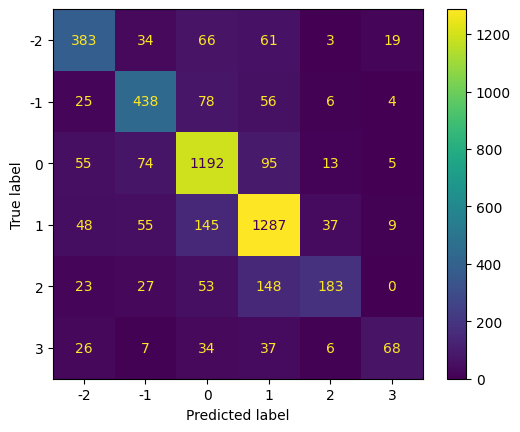

In [147]:
#Confusion Display Matrix Using KNeighbors Classifier
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(ytest,ypred)

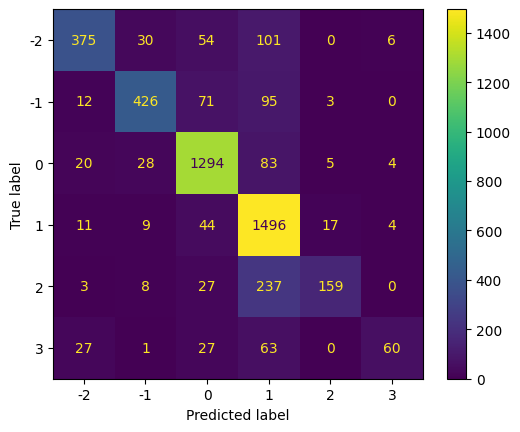

In [148]:
ConfusionMatrixDisplay.from_predictions(ytest,y_pred)
#COnfusion Matrix Display -Support Vector Algorithm

In [149]:
from nltk.metrics.scores import accuracy
print('Accuracy Score',accuracy(ytest,y_pred))

Accuracy Score 0.79375
